In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline
%matplotlib inline


In [3]:
# Load the dataset
df = pd.read_csv("fake_job_postings.csv")

# Display first few rows
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (17880, 18)


In [7]:
# Info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [9]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)


salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

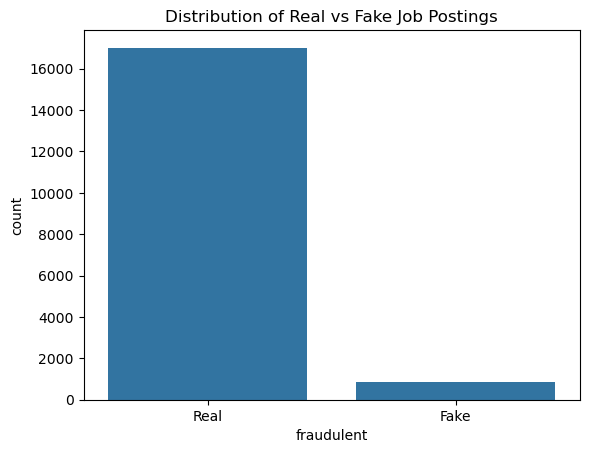

fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64

In [11]:
# Class distribution
sns.countplot(x='fraudulent', data=df)
plt.title("Distribution of Real vs Fake Job Postings")
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

# Percentage
df['fraudulent'].value_counts(normalize=True) * 100


In [13]:
# Drop high-missing columns
cols_to_drop = ['salary_range', 'department', 'benefits', 'required_education', 'required_experience']
df.drop(columns=cols_to_drop, inplace=True)


In [15]:
df.drop(columns=['job_id'], inplace=True)


In [17]:
# Drop rows where critical text fields are missing
df.dropna(subset=['description', 'title', 'requirements', 'company_profile'], inplace=True)


In [19]:
# Optional: Fill remaining text columns with empty string
text_cols = ['requirements', 'company_profile', 'industry', 'function', 'employment_type', 'location']
for col in text_cols:
    df[col] = df[col].fillna('')


In [21]:
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements']


In [23]:
df[['text', 'fraudulent']].head()


,text,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0


In [25]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Combine relevant text columns, fill NaNs
df['text'] = (
    df['title'].fillna('') + ' ' +
    df['company_profile'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['requirements'].fillna('')
)

# Define preprocessing
def preprocess_text(text):
    try:
        text = str(text).lower()
        text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
        return ' '.join(tokens)
    except:
        return ''

# Apply to text column
df['clean_text'] = df['text'].apply(preprocess_text)

# Filter out empty rows
initial_len = len(df)
df = df[df['clean_text'].notnull() & df['clean_text'].str.strip().astype(bool)]
final_len = len(df)

print(f"✅ Cleaned rows retained: {final_len} / {initial_len}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Cleaned rows retained: 0 / 12630


In [40]:
def preprocess_text(text):
    try:
        text = str(text).lower()
        text = ''.join([c for c in text if c not in string.punctuation])  # keep digits
        tokens = word_tokenize(text)
        # REMOVE: filtering by stopwords and short length
        tokens = [lemmatizer.lemmatize(w) for w in tokens]
        return ' '.join(tokens)
    except:
        return ''


In [42]:
df['text'] = (
    df['title'].fillna('') + ' ' +
    df['company_profile'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['requirements'].fillna('')
)

df['clean_text'] = df['text'].apply(preprocess_text)
df = df[df['clean_text'].notnull() & df['clean_text'].str.strip().astype(bool)]

print(f"✅ Cleaned rows retained: {len(df)} / 12630")


✅ Cleaned rows retained: 0 / 12630
